# Unemployment Analysis with Python
Analyze unemployment rate data (representing the percentage of unemployed people) by asking analytical questions and answering them using Python code and visualizations.

## Import Libraries & Read the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from statsmodels.tsa.seasonal import STL
from scipy import stats


plt.rcParams['figure.figsize'] = (12,5)
sns.set(style="whitegrid")

In [2]:
df1 = pd.read_csv("/content/Unemployment in India.csv")
df2 = pd.read_csv("/content/Unemployment_Rate_upto_11_2020.csv")

In [3]:
df1.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [4]:
df1.shape

(768, 7)

In [5]:
df2.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [6]:
df2.shape

(267, 9)

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


## Data cleaning

> 1.convert Date column to datetime

In [9]:
df1[' Date'] = pd.to_datetime(df1[' Date'], dayfirst=True)
df2[' Date'] = pd.to_datetime(df2[' Date'], dayfirst=True)

> 2.rename “Region.1” in df2 to something meaningful (e.g. “Region_category”)

In [10]:
df2 = df2.rename(columns={'Region.1':'Region_category'})

In [11]:
df2.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region_category,longitude,latitude
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.74


> 3.check missing values

In [12]:
df1.isnull().sum()

,0
Region,28
Date,28
Frequency,28
Estimated Unemployment Rate (%),28
Estimated Employed,28
Estimated Labour Participation Rate (%),28
Area,28


**Insights:**
<br>
Find missing value so, drop it

In [13]:
df1 = df1.dropna()

In [14]:
df1.isnull().sum()

,0
Region,0
Date,0
Frequency,0
Estimated Unemployment Rate (%),0
Estimated Employed,0
Estimated Labour Participation Rate (%),0
Area,0


In [15]:
df2.isnull().sum()

,0
Region,0
Date,0
Frequency,0
Estimated Unemployment Rate (%),0
Estimated Employed,0
Estimated Labour Participation Rate (%),0
Region_category,0
longitude,0
latitude,0


> 4.check duplicated recoreds

In [16]:
df1 = df1.drop_duplicates()
df1.shape

(740, 7)

In [17]:
df2 = df2.drop_duplicates()
df2.shape

(267, 9)

> **Insights**
<br>
remove dupicated record

> 5.standardize “Frequency” column (Monthly vs M)

In [18]:
df1[' Frequency'] = df1[' Frequency'].str[1]

In [19]:
df1.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,2019-05-31,M,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,2019-06-30,M,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,2019-07-31,M,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,2019-08-31,M,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,2019-09-30,M,5.17,12256762.0,44.68,Rural


## Merge the datasets

In [20]:
df = pd.concat([df1, df2], ignore_index=True)

In [21]:
df.shape

(1007, 10)

In [22]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Region_category,longitude,latitude
0,Andhra Pradesh,2019-05-31,M,3.65,11999139.0,43.24,Rural,NaN,NaN,NaN
1,Andhra Pradesh,2019-06-30,M,3.05,11755881.0,42.05,Rural,NaN,NaN,NaN
2,Andhra Pradesh,2019-07-31,M,3.75,12086707.0,43.50,Rural,NaN,NaN,NaN
3,Andhra Pradesh,2019-08-31,M,3.32,12285693.0,43.97,Rural,NaN,NaN,NaN
4,Andhra Pradesh,2019-09-30,M,5.17,12256762.0,44.68,Rural,NaN,NaN,NaN


**Note**
<br>
NAN values appear after merge beacause:
- rows from df1 → columns (Region_category, longitude, latitude) not exist = NaN

- rows from df2 → column (Area) not exist = NaN

## EDA (Exploratory Data Analysis)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 10 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Region                                    1007 non-null   object        
 1    Date                                     1007 non-null   datetime64[ns]
 2    Frequency                                1007 non-null   object        
 3    Estimated Unemployment Rate (%)          1007 non-null   float64       
 4    Estimated Employed                       1007 non-null   float64       
 5    Estimated Labour Participation Rate (%)  1007 non-null   float64       
 6   Area                                      740 non-null    object        
 7   Region_category                           267 non-null    object        
 8   longitude                                 267 non-null    float64       
 9   latitude                      

In [24]:
df.describe()

,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,1007,1007.000000,1.007000e+03,1007.000000,267.000000,267.000000
mean,2020-01-31 06:06:04.647467776,11.906991,8.996209e+06,42.378620,22.826048,80.532425
min,2019-05-31 00:00:00,0.000000,4.942000e+04,13.330000,10.850500,71.192400
25%,2019-09-30 00:00:00,4.685000,1.639125e+06,37.835000,18.112400,76.085600
50%,2020-01-31 00:00:00,8.890000,5.543380e+06,40.880000,23.610200,79.019300
75%,2020-05-31 00:00:00,16.125000,1.287115e+07,45.315000,27.278400,85.279900
max,2020-10-31 00:00:00,76.740000,5.943376e+07,72.570000,33.778200,92.937600
std,NaN,10.739549,1.020784e+07,8.048542,6.270731,5.831738


In [25]:
df1['Area'].unique()

array(['Rural', 'Urban'], dtype=object)

In [26]:
df2['Region'].unique()

array(['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Meghalaya', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal'], dtype=object)

In [27]:
df2['Region_category'].unique()

array(['South', 'Northeast', 'East', 'West', 'North'], dtype=object)

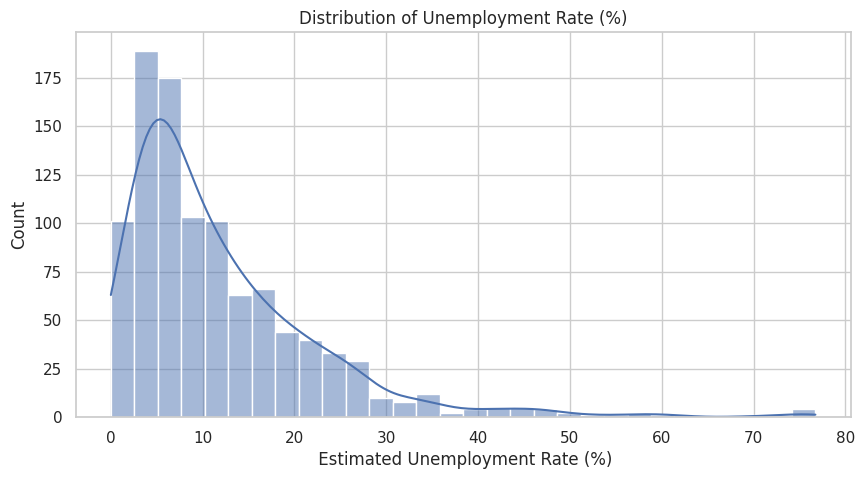

In [28]:
plt.figure(figsize=(10,5))
sns.histplot(df[' Estimated Unemployment Rate (%)'], bins=30, kde=True)
plt.title('Distribution of Unemployment Rate (%)')
plt.show()

**Insights**
<br>
The distribution is right-skewed → most unemployment values are low (below 10%), but there are a few very high peaks (above 60%). This indicates that there were certain periods where unemployment suddenly increased sharply.



---



### **What is the trend of unemployment rate over time?**

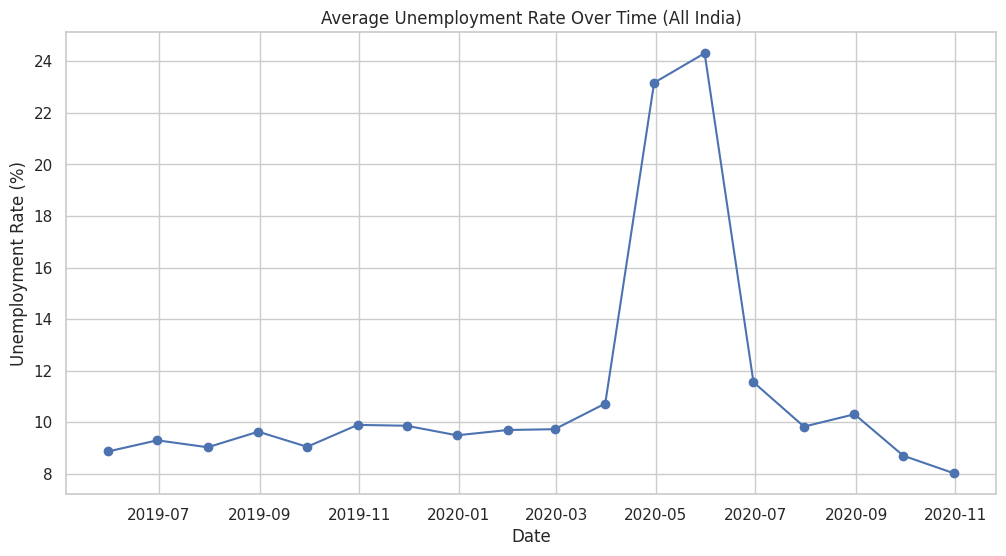

In [29]:
df_monthly = df.groupby(' Date')[' Estimated Unemployment Rate (%)'].mean().reset_index()

plt.figure(figsize=(12,6))
plt.plot(df_monthly[' Date'], df_monthly[' Estimated Unemployment Rate (%)'], marker='o')
plt.title('Average Unemployment Rate Over Time (All India)')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.show()

**Insights**
<br>
From mid-2019 to early-2020, India’s unemployment rate was relatively stable around 7% - 9%.

After March 2020, there was a very large spike, reaching around 23% in May 2020 → this is the direct effect of the COVID-19 lockdown. After that, unemployment gradually decreased again.



---



### **Which highest states were most affected during COVID?**

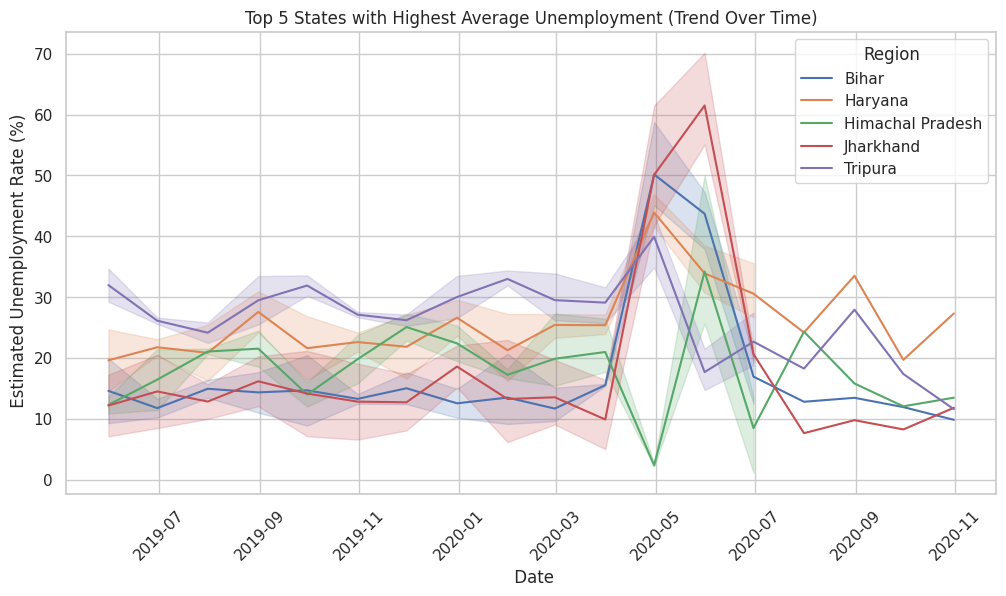

In [30]:
top5 = df.groupby('Region')[' Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False).head(5).index
df_top5 = df[df['Region'].isin(top5)]

plt.figure(figsize=(12,6))
sns.lineplot(data=df_top5, x=' Date', y=' Estimated Unemployment Rate (%)', hue='Region')
plt.xticks(rotation=45)
plt.title('Top 5 States with Highest Average Unemployment (Trend Over Time)')
plt.show()

**Insights**
<br>
The data and line plot clearly show that COVID-19 had a dramatic short-term impact on unemployment in India, with all five top states experiencing a steep surge in joblessness during the lockdown months of 2020, followed by gradual stabilization as restrictions eased.



---



### **Is rural or urban more unemployed?**

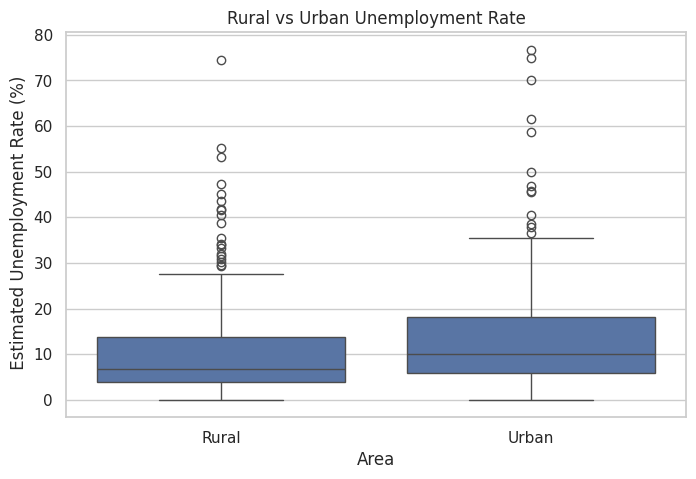

In [31]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Area', y=' Estimated Unemployment Rate (%)', data=df)
plt.title('Rural vs Urban Unemployment Rate')
plt.show()

**Insight:**
<br>
The boxplot shows:

- Urban unemployment is generally higher than rural.

- Both have outliers during the COVID period.

This makes sense, because urban economies (factories, companies, shops) were more affected by lockdowns compared to rural areas.



---



### **Did unemployment spike during COVID lockdown?**

In [32]:
before_covid = df[df[' Date'] < '2020-03-01']
during_covid = df[(df[' Date'] >= '2020-03-01') & (df[' Date'] <= '2020-06-30')]

print("Mean unemployment before COVID:", before_covid[' Estimated Unemployment Rate (%)'].mean())
print("Mean unemployment during COVID:", during_covid[' Estimated Unemployment Rate (%)'].mean())

Mean unemployment before COVID: 9.484931972789116
Mean unemployment during COVID: 17.419421221864955


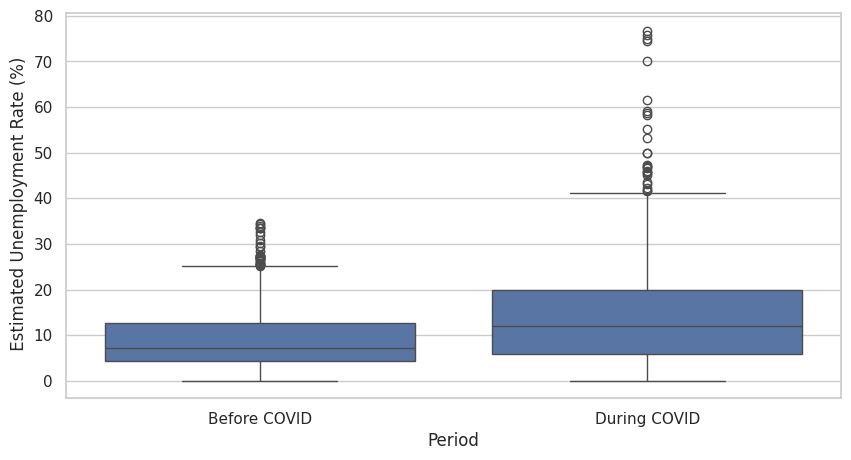

In [33]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Period', y=' Estimated Unemployment Rate (%)',
            data=df.assign(Period=lambda x: ['Before COVID' if d < pd.Timestamp('2020-03-01') else 'During COVID' for d in x[' Date']]))
plt.show()

**Insight:**
<br>
The average unemployment rate in India increased significantly during the COVID-19 pandemic.
Before COVID (before March 2020), the mean unemployment rate was around 9.48%, while during the COVID period (March–June 2020) it jumped to 17.41%.
This shows that the unemployment rate almost doubled during the lockdown period, indicating a strong negative economic impact caused by the pandemic.



---



### **Is there seasonal pattern?**

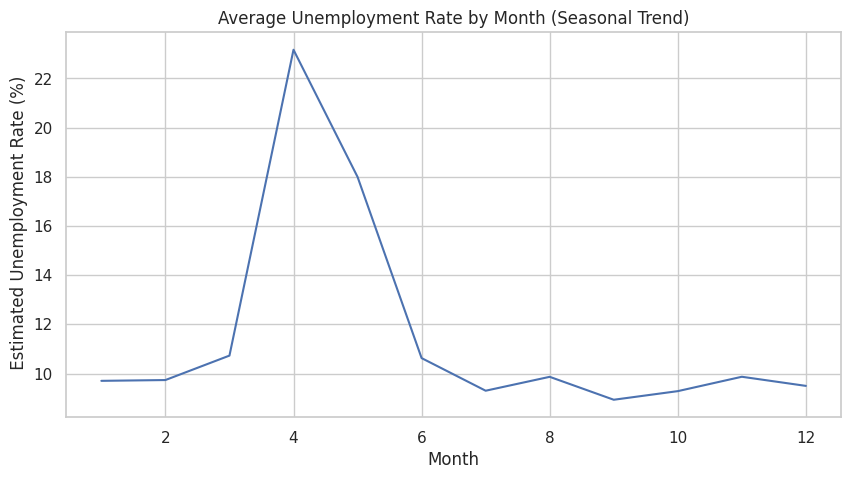

In [34]:
df['Month'] = df[' Date'].dt.month

plt.figure(figsize=(10,5))
sns.lineplot(x='Month', y=' Estimated Unemployment Rate (%)', data=df.groupby('Month')[' Estimated Unemployment Rate (%)'].mean().reset_index())
plt.title('Average Unemployment Rate by Month (Seasonal Trend)')
plt.show()

**Insight:**
<br>
The highest unemployment rate occurs in April.

This matches the period of full lockdown.

There is no strong seasonal pattern across the rest of the year, except for the COVID peak period.




---



**Insights Summary**
<br>
- unemployment was stable before COVID (around ~9%)

- during COVID unemployment almost doubled (~17%)

- Urban areas were more affected than Rural

- peak happened around April/May 2020 depending on dataset

- all states showed the spike → not only one state

*Unemployment in India was stable before 2020, but with the beginning of the COVID-19 pandemic, unemployment increased dramatically—especially in urban areas—showing that urban economies were the most affected by the lockdown.*



---



**Conclusion**

*The unemployment shock in India during the COVID-19 lockdown was sudden, large, and nation-wide.
The data clearly shows that the labour market disruption was more severe in urban regions, reflecting the sensitivity of industry and services sectors to lockdown measures.*